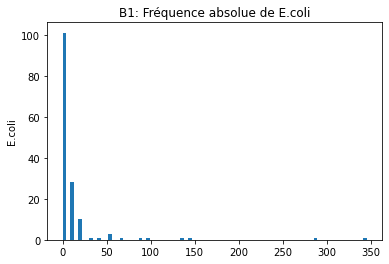

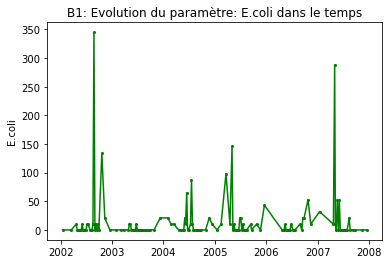

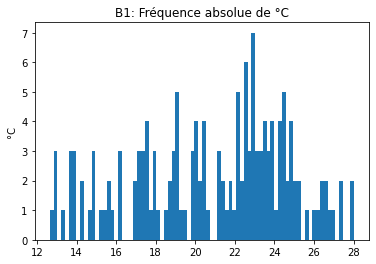

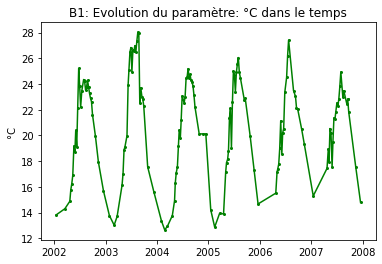

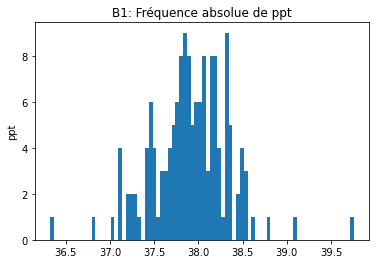

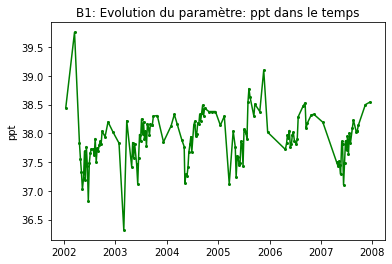

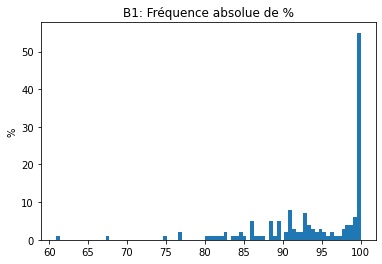

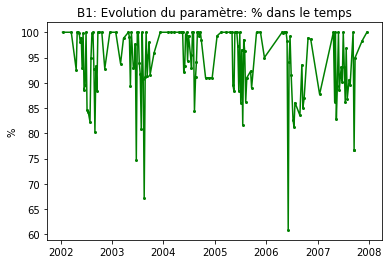

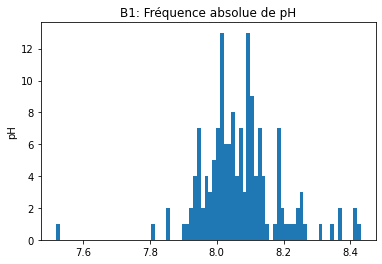

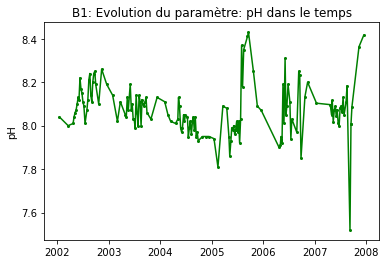

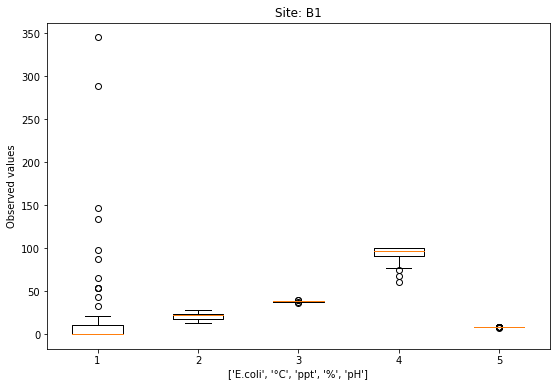

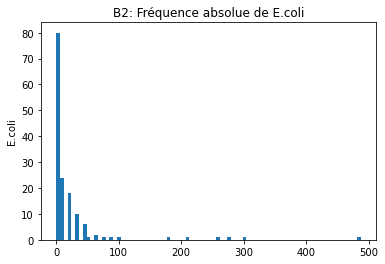

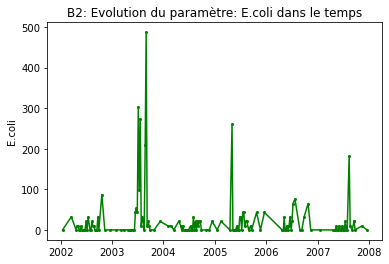

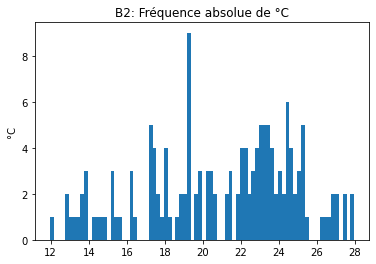

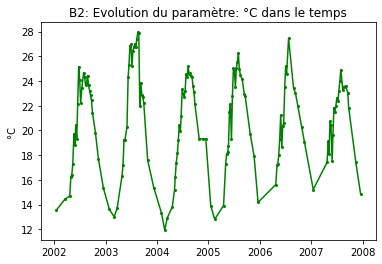

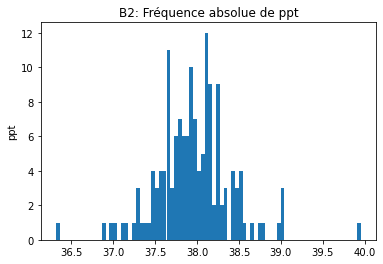

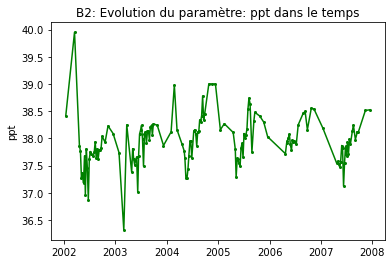

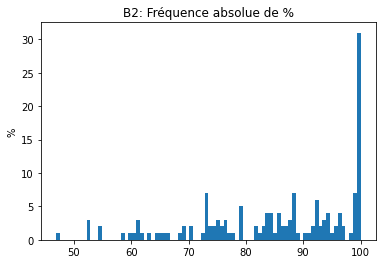

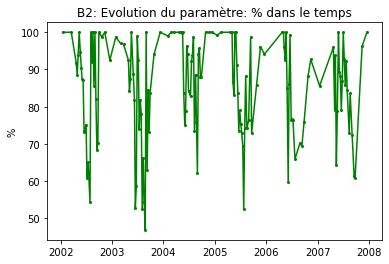

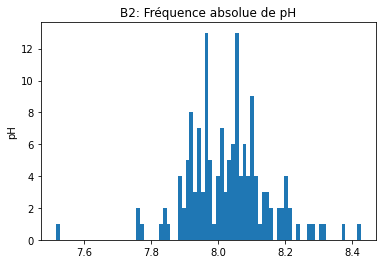

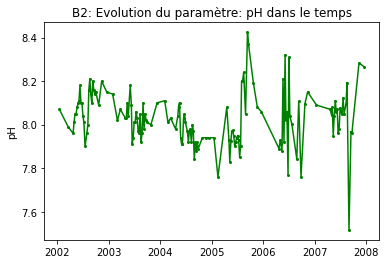

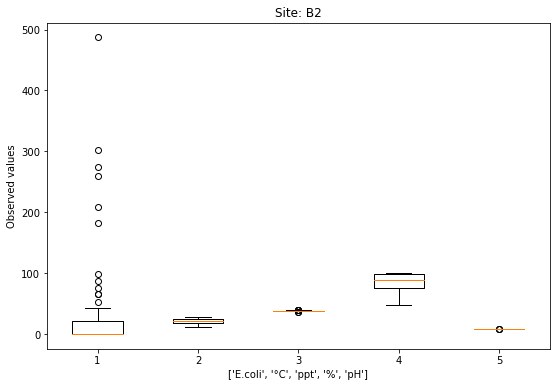

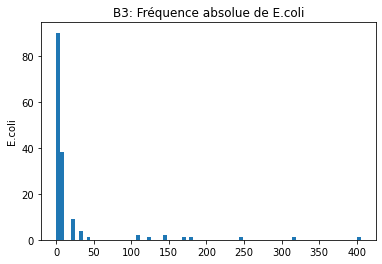

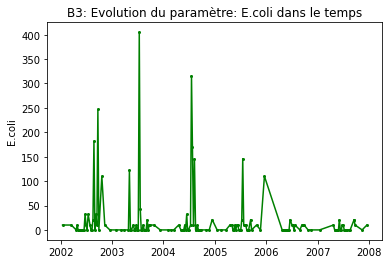

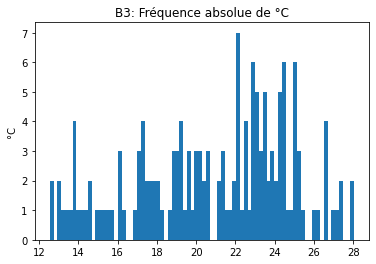

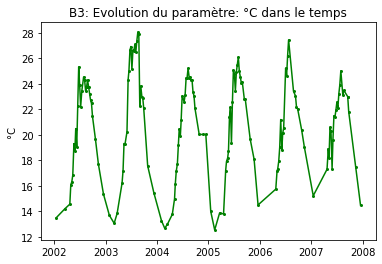

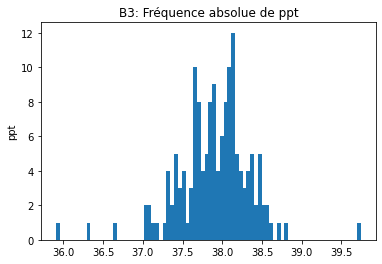

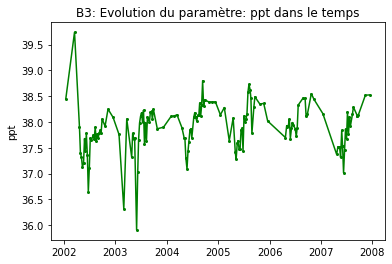

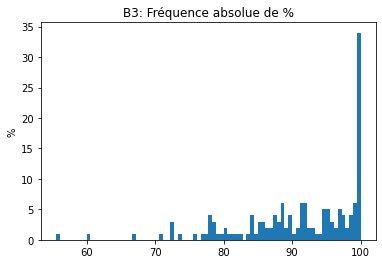

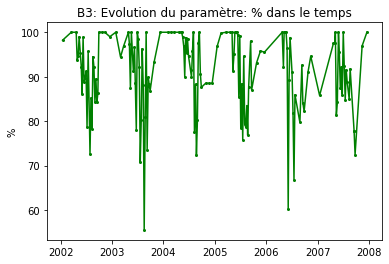

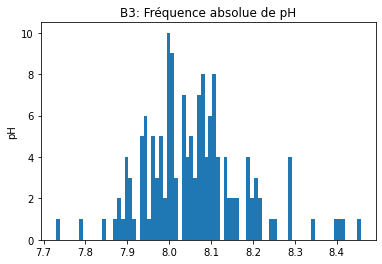

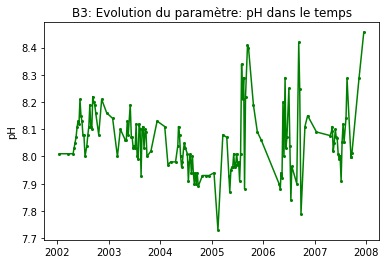

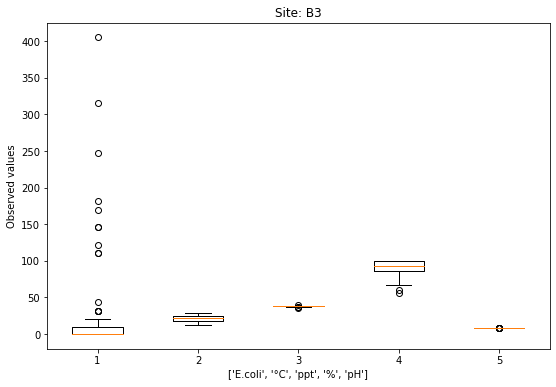

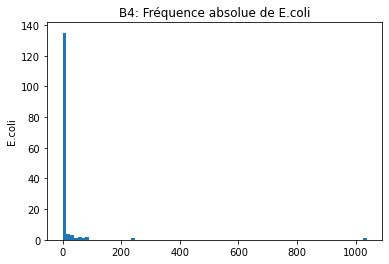

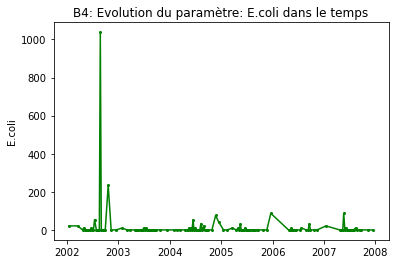

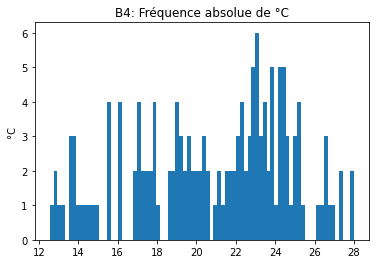

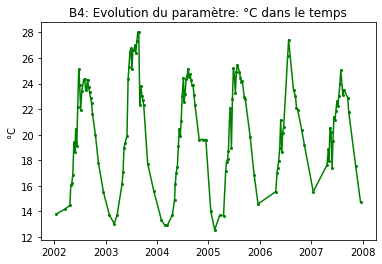

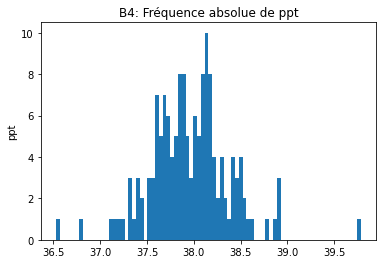

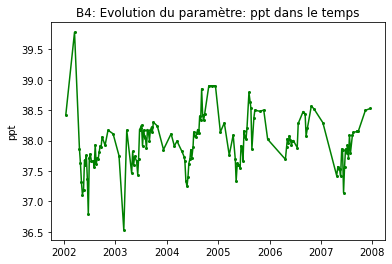

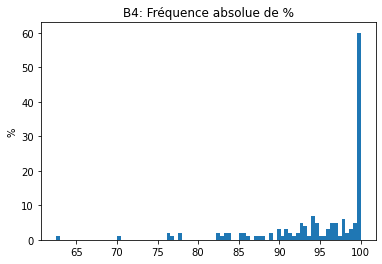

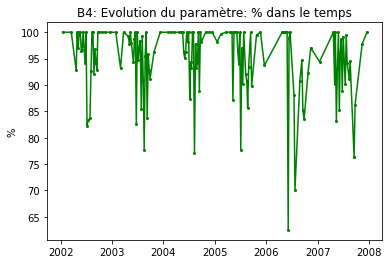

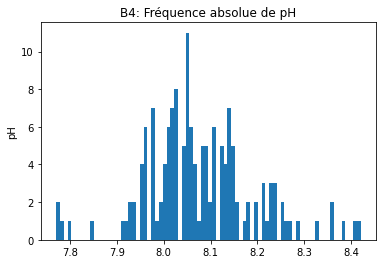

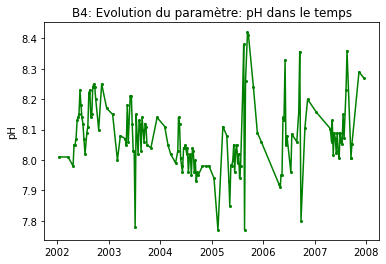

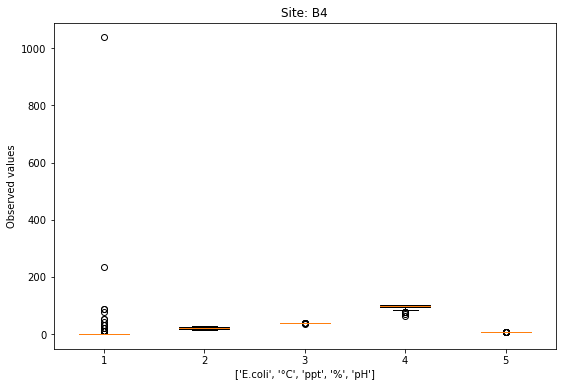

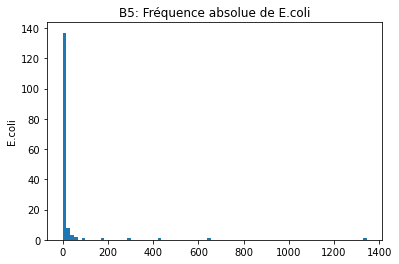

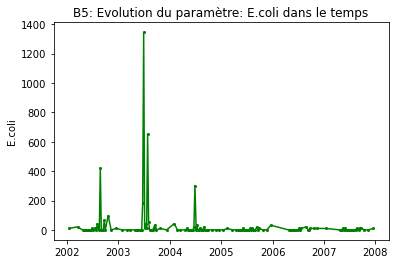

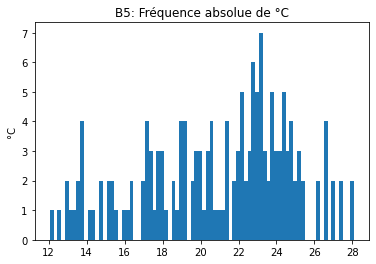

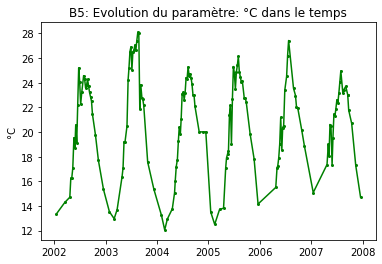

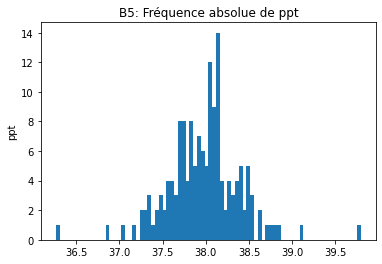

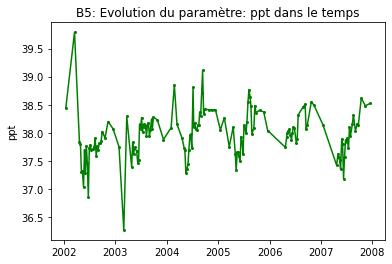

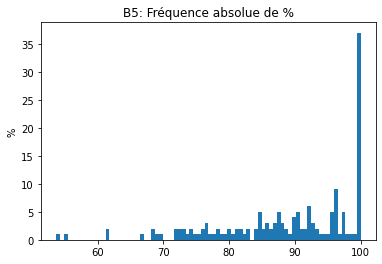

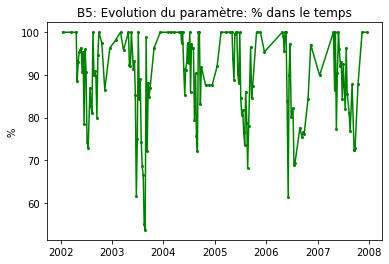

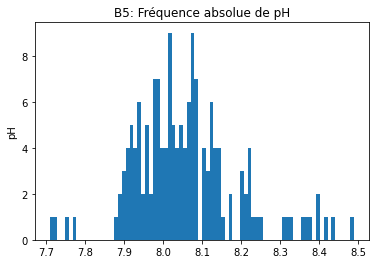

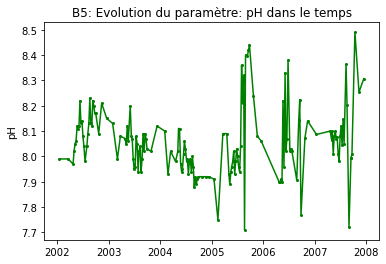

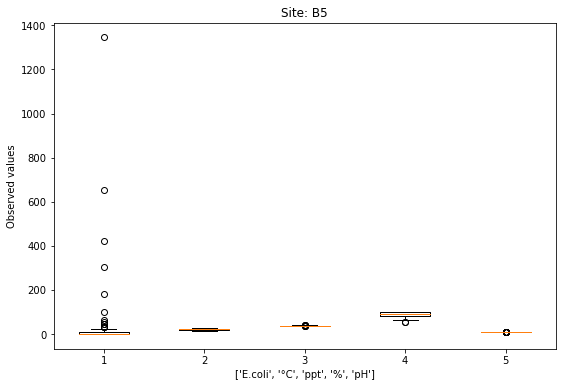

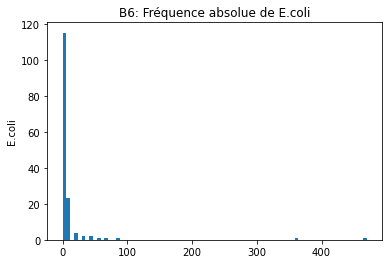

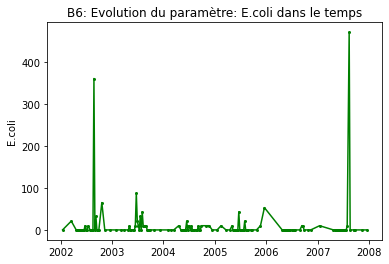

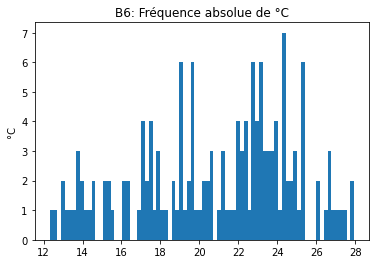

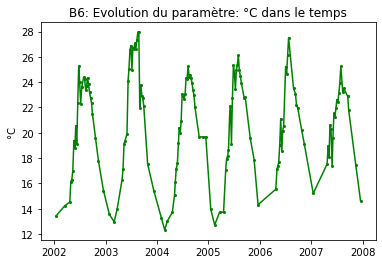

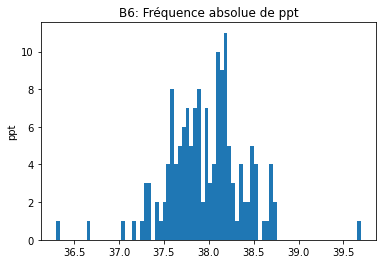

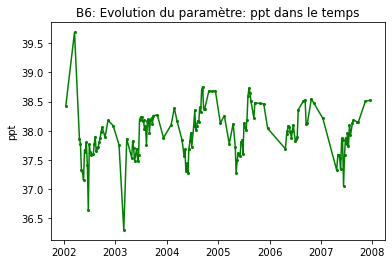

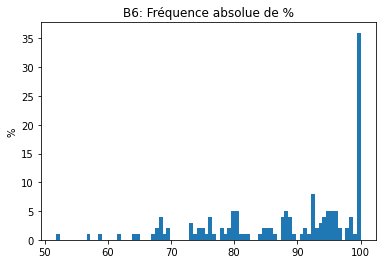

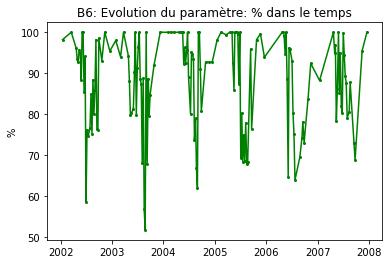

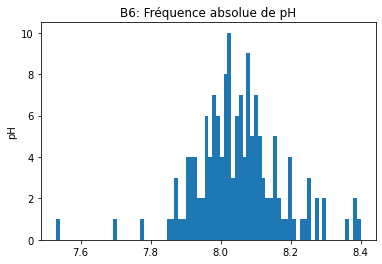

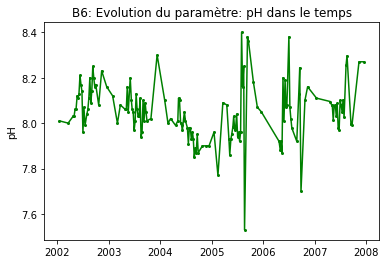

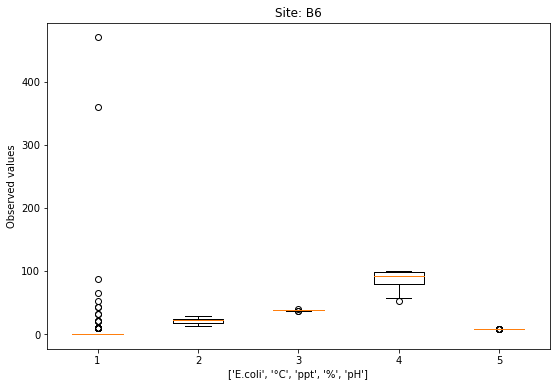

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# dictionnaire externe qui a les sites comme clés, et comme valeurs des dictionnaires
sites_to_plot = {}

# Déclaration des listes
li_date = []
li_e_coli = []
li_e_coli_qual = []
li_temperature = []
li_ppt = []
li_percentage = []
li_pH = []

# déclaration des variables
dates = 'Date'
e_coli = 'E.coli'
e_coli_qualite = 'E.coli_qualite'
temperature = '°C'
ppt = 'ppt'
percentage = '%'
pH = 'pH'

# j'importe le fichier csv en utilisant la librerie pandas, et création d'un dataframe
data = pd.read_csv('C:\interview_bioc\case_bioc.csv', encoding='utf-8', header=None, chunksize=1)

def reset(site):
    '''
    cette fonction est utilisée pour réinitialiser les valeurs des clés lorsque on passe au site 
    suivant dans la construction du dictionnaire
    :param site: le sujet à passer est la clé du dictionnaire, correspondant au site
    '''
    column_list = {dates: [], e_coli: [], e_coli_qualite: [], temperature: [], ppt: [], percentage: [], pH: []}
    sites_to_plot[site] = column_list


def insert_values(array):
    '''
    Cette méthode permet de créer des listes de paramètres observés, réparties selon le site.
    Ces listes sont celles qui rempliront le dictionnaire.
    Certaines colonnes, telles que le jour et le mois, sont exclues.
    :param array: liste se référant à la même clé (site)
    '''
    li_date = sites_to_plot[array[1]][dates]
    li_date.append(array[4])

    li_e_coli = sites_to_plot[array[1]][e_coli]
    li_e_coli.append(array[5])

    li_e_coli_qual = sites_to_plot[array[1]][e_coli_qualite]
    li_e_coli_qual.append(array[6])

    li_temperature = sites_to_plot[array[1]][temperature]
    li_temperature.append(array[7])

    li_ppt = sites_to_plot[array[1]][ppt]
    li_ppt.append(array[8])

    li_percentage = sites_to_plot[array[1]][percentage]
    li_percentage.append(array[9])

    li_pH = sites_to_plot[array[1]][pH]
    li_pH.append(array[10])


def interpolation(lista):
    """
    Méthode qui effectue l'interpolation des données E.coli,°C, ppt, %, pH.
    La liste examinée est convertie en une "pandas series", puis la méthode d'interpolation
    de cette librairie est utilisée et puis il est reconverti en une liste régulière.
    :param lista: ce paramètre, puisque la fonction est lancée dans une for loop, prend en compte
    l'un après l'autre la liste qui construit la colonne des données examinées.
    """
    return pd.Series(lista).interpolate().to_list()


def plot_graf(list, label, site):
    '''
    Cette méthode permet d'obtenir un histogramme représentant la fréquence absolue
    des différents paramètres examinés (E.coli,°C, ppt, %, pH)
    :param list : paramètre qui prend la liste des données qui doivent être insérées dans 
    l'histogramme
    :param label : Étiquette à mettre dans l'axe des y
    :param site : clé du dictionnaire "sites_to_plot" qui représente le site, chaque fois différent.
    '''
    plt.hist(list, bins=80)
    plt.title(site + ': Fréquence absolue de ' + label)
    plt.ylabel(label)
    plt.show()


def plot_date(x, y, label, site):
    '''
    Cette méthode est utilisée pour tracer le graphique de évolution au fil des années
    des différents paramètres examinés
    :param x: liste des dates à insérer dans l'axe des x
    :param y: liste des différents paramètres, chacun à son tour,
              entre la liste suivante E.coli,°C, ppt, %, pH
    :param label: étiquette de l'axe des y
    :param site: clé du dictionnaire sites_to_plot représentant le site, temps x temps différent
    '''
    plt.plot_date(x, y, linestyle='-',color='g',markersize=2)
    plt.title(site + ': Evolution du paramètre: ' + label + ' dans le temps')
    plt.ylabel(label)
    plt.show()


def plot_boxplot(li_ecoli, li_temperature, li_ppt, li_percentage, li_pH, site):
    '''
    méthode qui permet d'obtenir 5 box plots en une seule figure, les 5 premiers paramètres 
    représentent les séries de données qui sont insérées dans le graphique
    :param li_ecoli:
    :param li_temperature:
    :param li_ppt:
    :param li_percentage:
    :param li_pH:
    :param site: clé du dictionnaire sites_to_plot représentant le site, temps x temps différent
    '''
    labels = [e_coli, temperature, ppt, percentage, pH]
    data_to_plot = [li_ecoli, li_temperature, li_ppt, li_percentage, li_pH]
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.add_subplot()
    ax.boxplot(data_to_plot)
    plt.title('Site: ' + site)
    plt.xlabel(labels)
    plt.ylabel('Observed values')
    plt.show()

def clean_value(liste):
    '''
    ici les valeurs sont " nettoyées ", en particulier les valeurs d'oxygène 
    (en position 9 de la liste) sont réassignées  à 100 si elles dépassent ce nombre.
    :param liste: liste du dataframe
    '''
    if liste[9] > 100:
        liste[9] = 100

# Avec cette for loop, chaque élément, c'est-à-dire la "ligne" du dataframe (date), est transformé en 
#ndarray, puis en liste afin de pouvoir accéder aux valeurs individuelles de la liste résultante
for elem in data:
    liste = elem.to_numpy()[
        0].tolist()

    if liste[1] != "Site":
        clean_value(liste)
        # ce if permet de vérifier s'il y a des valeurs vides dans les colonnes "date" et 
        #"e.coli_qualitè", et si il y a un erreur de mesure dans le valeur du pH. Si des valeurs vides 
        #sont trouvées, ou il y a un erreur de mesure dans le pH, la ligne entière est sautée et n'est
        # pas ajoutée au dictionnaire, de sorte que la correspondance entre le nombre de variables 
        #lors du ploting des données n'est pas affectée.
        if liste[4] != '' and liste[4] != None and type(liste[4]) != float and \
                liste[6] != '' and liste[6] != None and type(liste[6]) != float\
                and liste[10] > 7.5 and liste[10] < 8.5:
            # si la valeur correspondant à cet indice, dans ce cas les sites (B1,B2,B3,B4,B5,B6) 
            # existent déjà entre les clés de ce dictionnaire, alors les valeurs sont insérées 
            #(voir la méthode insert values())
            if liste[1] in sites_to_plot.keys():
                insert_values(liste)
            else:
                # si "liste [1]" ne fait pas partie des clés du dictionnaire, alors les listes sont 
                #réinitialisées, puis les valeurs sont ajoutées pour la première fois
                reset(liste[1])
                insert_values(liste)

# avec le premier for loop on tourne à l'intérieur des clés et des valeurs du dictionnaire externe
for site, chiavi in sites_to_plot.items():
    # avec le deuxième cycle, on passe dans les clés et les valeurs du dictionnaire le plus interne. 
    # Les valeurs de ce dictionnaire sont les ensembles de données appartenant aux différentes 
    # colonnes considérées
    for key_lista, lista in chiavi.items():
        # avec ce if, les colonnes à interpoler sont sélectionnées, et les histogrammes des valeurs 
        #absolues sont tracés
        if key_lista == e_coli or key_lista == temperature or key_lista == ppt or key_lista == percentage or key_lista == pH:
            sites_to_plot[site][key_lista] = interpolation(lista)
            plot_graf(sites_to_plot[site][key_lista], key_lista, site)
        #Avec ce if une colonne correspondant à la clé "Date" est sélectionnée.
        if key_lista == dates:
            # avec ce for loop, on tourne à l'intérieur des index et des éléments (les dates en format
            # "strings") qui se trouvent à l'intérieur de la liste des dates et on fait la conversion 
            # effective en une liste de dates, en utilisant une méthode de la librairie datetime, 
            # de sorte qu'elle puisse être réutilisée comme axe x dans les graphiques d'évolution 
            # temporelle
            for i, date in enumerate(sites_to_plot[site][key_lista]):
                # la condition pour effectuer la conversion est que la valeur ne soit pas nulle
                if type(date) != float and date != '' and date != None:
                    sites_to_plot[site][key_lista][i] = dt.datetime.strptime(date, '%m/%d/%Y').date()
        elif key_lista != e_coli_qualite:
            # les graphiques du trend temporel sont ploteés ici, à condition que la clé considérée 
            #soit différente de la variable indiquée dans le if
            plot_date(sites_to_plot[site][dates], sites_to_plot[site][key_lista], key_lista, site)

    # Box plotting pour chaque site
    plot_boxplot(sites_to_plot[site][e_coli],
                 sites_to_plot[site][temperature],
                 sites_to_plot[site][ppt],
                 sites_to_plot[site][percentage],
                 sites_to_plot[site][pH], site)




In [7]:
# Site B1

# -En ce qui concerne E. coli, à partir du graphique des fréquences absolues, 
# nous pouvons observer une distribution fortement asymétrique,
# alors qu'à partir du graphique de la tendance temporelle, on peut observer 3 événements 
# en particulier, anormaux, l'un en 2002, l'autre en 2005, et l'autre en 2007.

# -En ce qui concerne la température, on peut voir sur le graphique de tendance 
# temporelle les valeurs minimales et maximales qui reflètent la tendance saisonnière, 
# et un pic nettement élevé en 2003, qui a été une année très chaude. Au fil des ans,
# on peut constater que l'amplitude thermique annuelle a légèrement diminué dans le dernier an.

# -Le paramètre de la salinité a connu deux pics significatifs, l'un très élevé et l'autre très faible, 
# en 2002 et 2003 respectivement. Si l'on exclut les deux événements exceptionnels, 
# l'ampleur des valeurs extrêmes est restée presque constante au fil des ans.

# -Le pourcentage d'oxygène dans l'eau a subi de nombreuses oscillations au cours des années, 
# on constate notamment que, au fil des ans, les événements anormaux sont devenus plus fréquents.

# - En ce qui concerne le pH, une tendance particulière peut être observée. En effet, de 2002 à 2005,
# l'amplitude entre les valeurs extrêmes était assez constante, malgré une "alcalinisation" de l'eau, 
# mais à partir de 2006, l'amplitude entre les valeurs extrêmes a nettement augmenté, et en 2008, 
# des pics extrêmes particuliers peuvent être observés.

# Box Plot : à partir des box plots, la distribution avec le plus d'outliers est celle de E.coli,
# une tendance qui était déjà observable à partir du graphique de fréquence absolue (forte asymétrie).

# Dans les graphiques des sites suivants, nous pouvons observer des tendances assez similaires, 
# cependant, des différences significatives peuvent être observées dans les graphiques de l'évolution 
# temporelle de E.Coli a partir du site B4.

# Site B4,
# E.coli 
#distribution différente des sites précédents, avec un seul pic en 2002  

# Site B5,
# E.coli
# trois pics, en 2002, en 2003 et en 2005.

# Site B6,
# E.coli
# présence de deux pics importants en 2002 et 2007